Import Necessary Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

Load Dataset

In [5]:
# Define the relative paths to the image and annotation folders
train_reid_path = r'dataset\plain_re-ID\atrw_reid_train'
train_anno_reid_path = r'dataset\plain_re-ID\atrw_anno_reid_train\reid_list_train.csv'
test_reid_path = r'dataset\plain_re-ID\atrw_reid_test'
test_anno_reid_path = r'dataset\plain_re-ID\atrw_anno_reid_test\reid_list_test.csv'

# Define the absolute paths of the image and annotation folders
train_reid_path = os.path.abspath(train_reid_path)
train_anno_reid_path = os.path.abspath(train_anno_reid_path)
test_reid_path = os.path.abspath(test_reid_path)
test_anno_reid_path = os.path.abspath(test_anno_reid_path)

In [13]:
jpg_files_train = [f for f in os.listdir(train_reid_path) if os.path.isfile(os.path.join(train_reid_path, f)) and f.endswith('.jpg')]
print("Total number of training images: ", len(jpg_files_train))

jpg_files_test = [f for f in os.listdir(test_reid_path) if os.path.isfile(os.path.join(test_reid_path, f)) and f.endswith('.jpg')]
print("Total number of testing images: ", len(jpg_files_test))


Total number of training images:  3392
Total number of testing images:  1764


Display Tiger Images in Correspondence with Tiger-ID

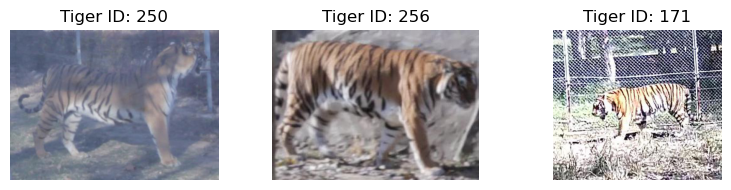

In [6]:
# Read the annotations CSV file
train_anno_df = pd.read_csv(train_anno_reid_path, names=['Tiger ID', 'Image Number'])
test_anno_df = pd.read_csv(test_anno_reid_path, names=['Tiger ID', 'Image Number'])

# Display three tiger images and their IDs
fig, axes = plt.subplots(1, 3, figsize=(8, 2))

for i, (index, row) in enumerate(train_anno_df.iterrows()):
    if i == 3:
        break
    
    tiger_id = row['Tiger ID']
    image_number = row['Image Number']
    
    # Construct the path to the image file
    image_file = os.path.join(train_reid_path, f'{image_number}')
    
    # Load and display the image using PIL
    img = Image.open(image_file)
    axes[i].imshow(img)
    axes[i].set_title(f'Tiger ID: {tiger_id}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Explore Dataset

In [8]:
# Get the size of train and test dataset
train_df = pd.read_csv(train_anno_reid_path)
train_size = len(train_df)
test_df = pd.read_csv(test_anno_reid_path)
test_size = len(test_df)
print("Number of training images: ", train_size)
print("Number of testing images: ", test_size)

# Get the number of individual tigers in the dataset
tiger_ids = sorted(list(train_anno_df['Tiger ID'].unique()))
# test_tiger_ids = sorted(list(test_anno_df['Tiger ID'].unique()))
num_of_tigers = len(tiger_ids)

print("Number of individual tigers in the training dataset: ", num_of_tigers)
# print("Number of individual tigers in the testing dataset: ", len(test_tiger_ids))

Number of training images:  1886
Number of testing images:  1763
Number of individual tigers in the training dataset:  107
Number of individual tigers in the testing dataset:  1764


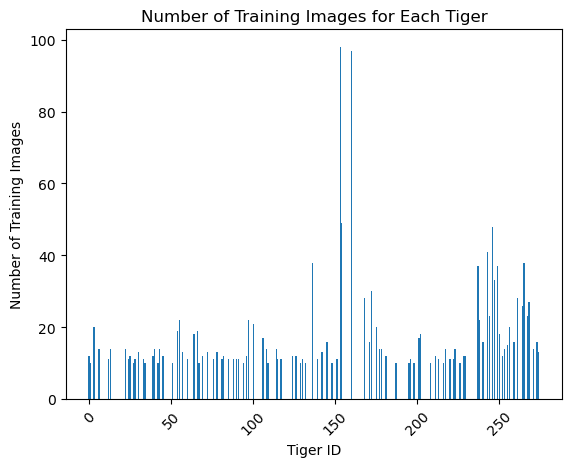

In [9]:
# Get the number of training images for each individual tigers
train_df = pd.read_csv(train_anno_reid_path, header=None)
counts = train_df[0].value_counts()

# Plot the numnber of training images for each tiger
plt.bar(counts.index, counts.values)
plt.xlabel('Tiger ID')
plt.ylabel('Number of Training Images')
plt.title('Number of Training Images for Each Tiger')
plt.xticks(rotation=45)
plt.show()